<a href="https://colab.research.google.com/github/5und4r/PyTorchExcercises/blob/main/PytorchWorkflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
print("Jai Sri Ram!")

Jai Sri Ram!


# PyTorch Workflow

lets explore an example end to end workflow
Resources :
* Ground truth notebook :
https://github.com/mrdbourke/pytorch-deep-learning/blob/main/01_pytorch_workflow.ipynb
* Book Version :
https://www.learnpytorch.io/01_pytorch_workflow/
* For any doubts/discussions :
https://github.com/mrdbourke/pytorch-deep-learning/discussions

In [24]:
what_we_are_covering = {1: "data(prepare and load)",
                         2: "build model",
                         3: "fitting the model to the data(training)",
                         4:"making predictions/inferences and evaluating the model",
                         5: "saving and loading a model",
                         6: "putting it all together"}
print(what_we_are_covering)

{1: 'data(prepare and load)', 2: 'build model', 3: 'fitting the model to the data(training)', 4: 'making predictions/inferences and evaluating the model', 5: 'saving and loading a model', 6: 'putting it all together'}


torch.nn :
 https://docs.pytorch.org/docs/stable/nn.html

In [25]:
import torch
from torch import nn #nn contains all of pytorch's building blocks for neural networks
import matplotlib.pyplot as plt
#minimum pytorch version required : 1.10+cu for cuda
print(torch.__version__)
torch.cuda.is_available()

2.9.0+cu126


True

## 1. Data(preparing and loading)

Data can be almost anything in ML Like:
* Excel spreadsheet
* Images of any kind
* Videos (youtube has lots of them)
* Audio of any kind
* even DNA
* Text

ML is a game of 2 parts:
1. Get data inot numerical representation.
2. Build a model to learn patterns in that numerical representation

input->Numerical encoding->build neural networks to find patterns->out put the numerical representation->output

to showcase this, lets create some *known* data using linear regression formula

### Linear Regression:
A linear regression line has an equation of the form Y = a + bX, where X is the explanatory variable and Y is the dependent variable. The slope of the line is b, and a is the intercept (the value of y when x = 0).

we'll use a linear regression to makae a straight line with **Known Parameters**

In [26]:
#Create known parameters
weight = 0.7
bias = 0.3
# we want to build a model to estimate these numbers

# create data
start =0
end=1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1) #add the extra dimension
y = weight * X + bias

X[:10] , y[:10], #len(X), len(y) # X= input numbers, y= output numbers

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [27]:
len(X), len(y)

(50, 50)

### Splitting data into training and testing [most important in ML in genral]

*3 datasets* :
 1. training set : model learns patterns (always needed) [60 to 80 percent of data]
 2. validation set : tune model patterns (not often needed) [10 to 20 percent of data]
 3. test set : see if the model is ready for the real data operate on unseen data (always needed) [10 to 20 percent of data]

Genralization: the ability of the machine learning model to perform well on data it hasn't seen before.

Lets create a training and test set with our data

In [28]:
# create a train test split
train_split = int(0.8 * len(X)) #80% of data
X_train, y_train = X[:train_split], y[:train_split] #[:train_split] indicates up until the train split limit
X_test, y_test = X[train_split:], y[train_split:] #[train_split:] indicates values after the train split
len(X_train), len(y_train), len(X_test), len(y_test)
#print(train_split)

(40, 40, 10, 10)

In [29]:
X_train, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

### Visualize the data :

Data explorers motto :    
*"VISUALIZE, VISUALIZE, VISUALIZE"*

Matplotlib scatter

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

In [30]:
def plot_predictions(train_data=X_train,
                     train_lables=y_train,
                     test_data=X_test,
                     test_lables=y_test,
                     predictions=None):
    """
    plots training data, test data and compares predictions
    """
    plt.figure(figsize=(10,7))

    #Plot training data in bule
    plt.scatter(train_data, train_lables, c="b", s=4, label="training data")

    #plot testing data in green
    plt.scatter(test_data, test_lables, c="g", s=4, label="test data")

    #Check for predictions
    if predictions is not None:
      # plot predictions if they exist
      plt.scatter(test_data, predictions, c="r", s=4, label="predictions") # s indicates the marker size (size of the points and dots and stuff)

    # Show the legend
    plt.legend(prop={"size":14})



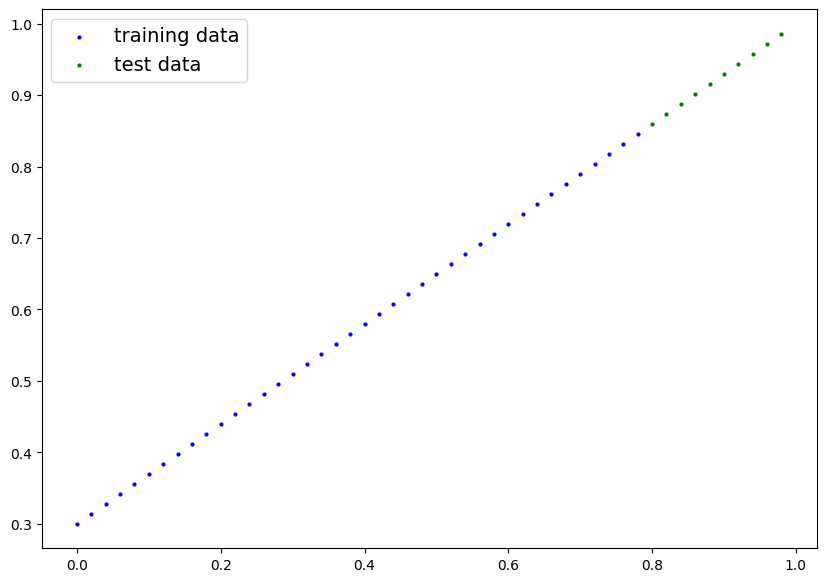

In [31]:
plot_predictions();

In [32]:
# define weight and bias
w= 0.8
b= 0.2
# Create data
strt = 5
stop = 10
stp = 0.01
x = torch.arange(strt,stop,stp).unsqueeze(dim = 1)
why = w*x+b
# viewing the data
x[:10], why[:10]
# Length of the data
print(len(x), len(why))

500 500


In [33]:
# Splitting the data into training and testing parts
tr_split = int(0.8*len(x))
x_train, why_train = x[:tr_split],why[:tr_split]
x_test, why_test = x[tr_split:],why[tr_split:]
len(x_train), len(why_train), len(x_test), len(why_test)

(400, 400, 100, 100)

In [34]:
#x_train, why_train

In [35]:
# Plotting the training , testing data an checking if any predictions exist
def predictionsForPlot(trainData=x_train,
                       trainLabels=why_train,
                       testData=x_test,
                       testLabels=why_test,
                       preds=None): # preds mean predicted values. we usually compare the predictions to the why_test values here to evaluate the goddness of the model, but here there is no predictions because whe have already defined the weights and bias up front already so predictions won't show up in graph/plot. To get the predictions line we have to derive the weights and bias.
  #plotting
  plt.figure(figsize=(5,5)) #first param = width, second praram = height

  #Training data
  plt.scatter(trainData, trainLabels, c = 'brown', s = 4, label = "Training Data")
  #Testing data
  plt.scatter(testData, testLabels, c = 'yellow', s = 4, label = "Testing Data")

  #Checking for predictions
  if preds is not None:
    # plotting predictions
    plt.scatter(testData, preds, c = 'green', s = 4, label = "Predictions")
  # show the legend
  plt.legend(prop={"size":14}); # create a legend for a plot and explicitly sets the font size of the legend entries to 14 points


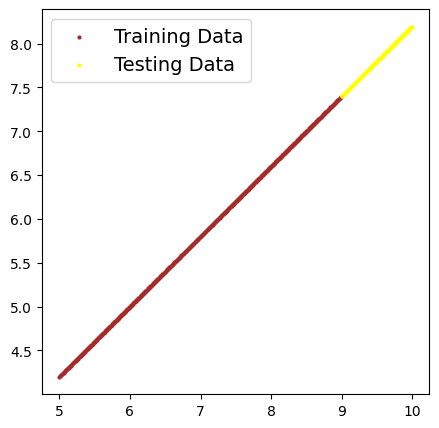

In [36]:
predictionsForPlot();

## 2. Building the Model
First PyTorch Model

* Linear Regression model

Learn OOP in python :
https://realpython.com/python-classes/

What our model does:
* Start with random values (weights and bias)
* Look at the training data and adjust the random values to better represent (or get closer to) the ideal values (the weight and bias values we used to create the data)

How does it do?

Through 2 main Algorithms:
1. Gradient descent : https://www.youtube.com/watch?v=IHZwWFHWa-w
2. Back Propogation : https://www.youtube.com/watch?v=Ilg3gGewQ5U

Torch.autograd is what implements gradient descent

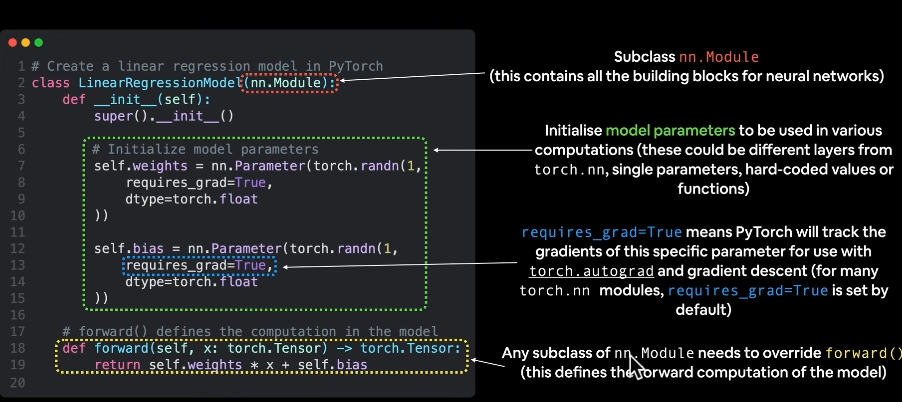

In [37]:
class LinearRegressionModel(nn.Module): # almost everything in pytorch inherits from nn.Module. Base class for all neural network modules.
  def __init__(self): #constructor
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, #Start with a random weight value and keep adujustinfg and updating it until the correct weight is found.
                                            requires_grad = True,
                                            dtype = torch.float)) #requires grad = if the parameter requires a gradient default is true # keep track of the gradients
    self.bias = nn.Parameter(torch.randn(1, #Start with a random bias and try to adjust it to the ideal bias
                                         requires_grad= True,
                                         dtype = torch.float)) # data is good as a float32

  # forward method  to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias  #linear regression formula #foreward() is called to perverom computation in every cell it needs to be overrided to perfrom computation

### PyTorch model building essentials

* `torch.nn` - contains all of the building blocks for computational graphs(a neural network can be considered as one)
* `torch.nn.Parameter` - what parameter should our model try and learn, often pytorch layer from torch.nn will set these for us
* `torch.nn.Module` - the base class for all the neural network modules if you subcalss it you shoulod override foreward()
* `torch.optim` - this is where the optimizers in pytorch live, they will help with gradient descent
* `def forward()` - all nn.module subcalsses require you to over ride them forward(), this method defines what happens in the computation.
* `torch.utils.data.Dataset `- helps in creating the dataser
* `torch.utils.data.DataLoader` - helps load our dataset to the model

https://pytorch-cn.com/tutorials/beginner/ptcheat.html



### Checking the contents of our pytorch model

We can check our model parameters or what inside our model using `.parameters()`.

In [38]:
# create a random seed
torch.manual_seed(42)
#create an instance of the model (sub calss of the nn.Module)
model_0 = LinearRegressionModel()
#check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [39]:
# List the named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [40]:
# ideal values
print(weight,bias)

0.7 0.3


### Making predicitons using `troch.inference_mode()`

To check the model's predictive power let's see how well it predictsw y_test based on x_test

when we pass data through the model, it's gonna run it through the forward() method

In [41]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [45]:
# Make predictions with model
with torch.inference_mode(): #when we make predictions its customary to use with inference mode, inference mode turns off the gradient tracking(no requires grad) predictions will be computed much faster
  y_preds = model_0(X_test)
# torch.no_grad can also be used in similar context, however torch.inference_mode is preferred
#with torch.no_grad:
  #y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

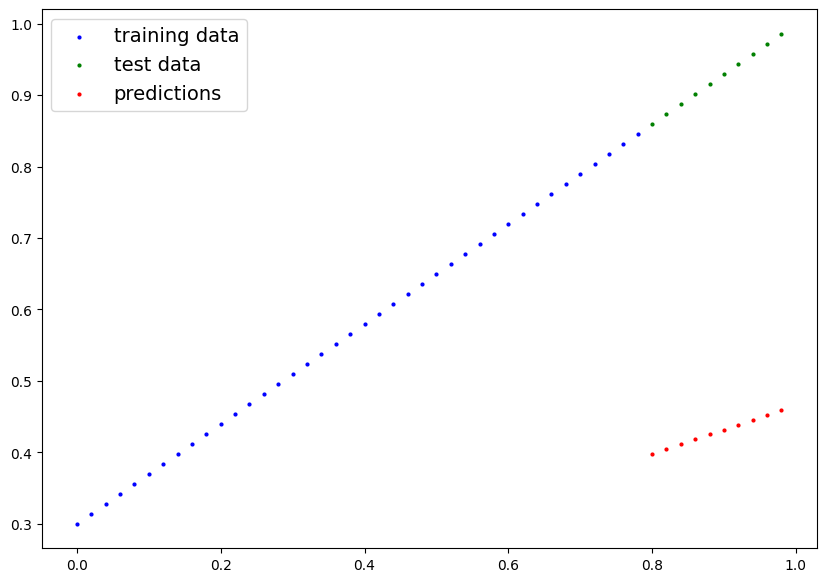

In [43]:
plot_predictions(predictions=y_preds)

### 3. Training the model

The whole idea of training is for a model to move from some unknow prarameters (random) to some known parameters

or in other words from a poor representation of the data to a better reprsentation of the data.

One way to measure how poor the model's predictions are is to use a loss function

https://docs.pytorch.org/docs/stable/nn.html#loss-functions

* Note : The loss function may also be called as cost function or cirterion in different areas.

Things Needed to train:

* ** Loss Function:** A function to measure how wrong your model's predictions are to the ideal output, lower is better.

* **Optimizer:** Takes into account the loss of a model and adjust the model's parameters(weights&bias) to imporve the loss function [weight update]

For PyTorch, we need :
 * A training loop
 * A testing loop